In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow as tf

In [6]:
x_data = np.linspace(0.0,10.0,1000000)

In [7]:
noise = np.random.randn(len(x_data))

In [8]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [9]:
noise.shape

(1000000,)

In [10]:
#y = mx + b
#b = 5
y_true = (0.5 * x_data) + 5 + noise

In [11]:
y_true

array([ 6.58549616,  5.82730793,  5.55635835, ..., 10.20109706,
       10.47677041, 10.93544141])

In [12]:
x_df= pd.DataFrame(data=x_data, columns=['X Data'])

In [13]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [14]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [15]:
my_data = pd.concat([x_df, y_df], axis=1)

In [16]:
my_data.head()

,X Data,Y
0,0.00000,6.585496
1,0.00001,5.827308
2,0.00002,5.556358
3,0.00003,4.750393
4,0.00004,5.852054


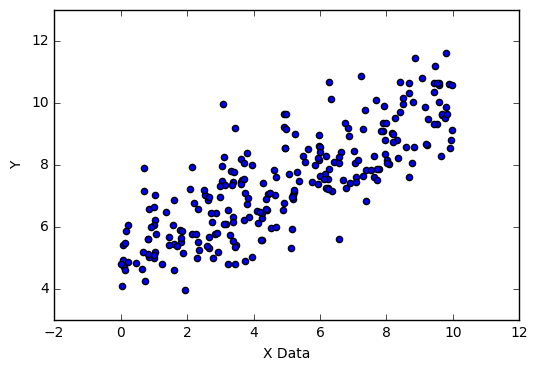

In [17]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [18]:
batch_size=8
np.random.randn(2)

array([-0.11066175,  0.44516481])

m= tf.Var

In [19]:
m = tf.Variable(0.96)
b = tf.Variable(0.57)

In [20]:
xph = tf.placeholder(tf.float32,[batch_size])

In [21]:
yph = tf.placeholder(tf.float32,[batch_size])

In [22]:
y_model = m*xph + b

In [23]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind= np.random.randint(len(x_data),size=batch_size)
        
        feed= {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict= feed)
    
    model_m, model_b = sess.run([m,b])

In [27]:
model_m

0.49454466

In [28]:
model_b

4.937095

In [29]:
y_hat = x_data*model_m + model_b

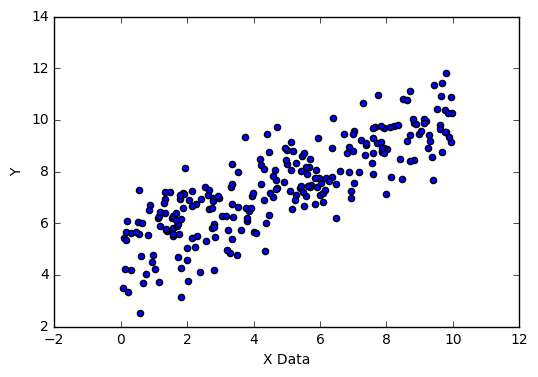

In [30]:
my_data.sample(250).plot(kind='scatter', x= 'X Data', y = 'Y')

In [31]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [32]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_num_worker_replicas': 1, '_task_id': 0, '_keep_checkpoint_max': 5, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f18943555c0>, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_checkpoints_steps': None, '_task_type': 'worker', '_master': '', '_is_chief': True, '_save_checkpoints_secs': 600, '_global_id_in_cluster': 0, '_evaluation_master': '', '_save_summary_steps': 100, '_model_dir': '/tmp/tmptmrhfrm2', '_train_distribute': None}


In [43]:
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'comb'